<a href="https://colab.research.google.com/github/yoonyoung27/public_big_data_analysis/blob/main/competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
total = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/process1.csv', encoding='cp949')  # CSV파일에 한글로 된 내용이 있는 경우
total.head()

,연월일,시간,구분,공급량
0,2013-01-01 01:00:00,1,A,2497.129
1,2013-01-01 02:00:00,2,A,2363.265
2,2013-01-01 03:00:00,3,A,2258.505
3,2013-01-01 04:00:00,4,A,2243.969
4,2013-01-01 05:00:00,5,A,2344.105


In [4]:
total['연월일'] = pd.to_datetime(total['연월일'])

In [5]:
total.head()

,연월일,시간,구분,공급량
0,2013-01-01 01:00:00,1,A,2497.129
1,2013-01-01 02:00:00,2,A,2363.265
2,2013-01-01 03:00:00,3,A,2258.505
3,2013-01-01 04:00:00,4,A,2243.969
4,2013-01-01 05:00:00,5,A,2344.105


In [6]:
total['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [7]:
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i+1
total['구분'] = total['구분'].map(d_map)

In [8]:
d_map

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'G': 6, 'H': 7}

In [9]:
total.head()

,연월일,시간,구분,공급량
0,2013-01-01 01:00:00,1,1,2497.129
1,2013-01-01 02:00:00,2,1,2363.265
2,2013-01-01 03:00:00,3,1,2258.505
3,2013-01-01 04:00:00,4,1,2243.969
4,2013-01-01 05:00:00,5,1,2344.105


In [10]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368088 entries, 0 to 368087
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   연월일     368088 non-null  datetime64[ns]
 1   시간      368088 non-null  int64         
 2   구분      368088 non-null  int64         
 3   공급량     368088 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 11.2 MB


In [11]:
total['year'] = total['연월일'].dt.year
total['month'] = total['연월일'].dt.month
total['day'] = total['연월일'].dt.day
total['weekday'] = total['연월일'].dt.weekday

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_

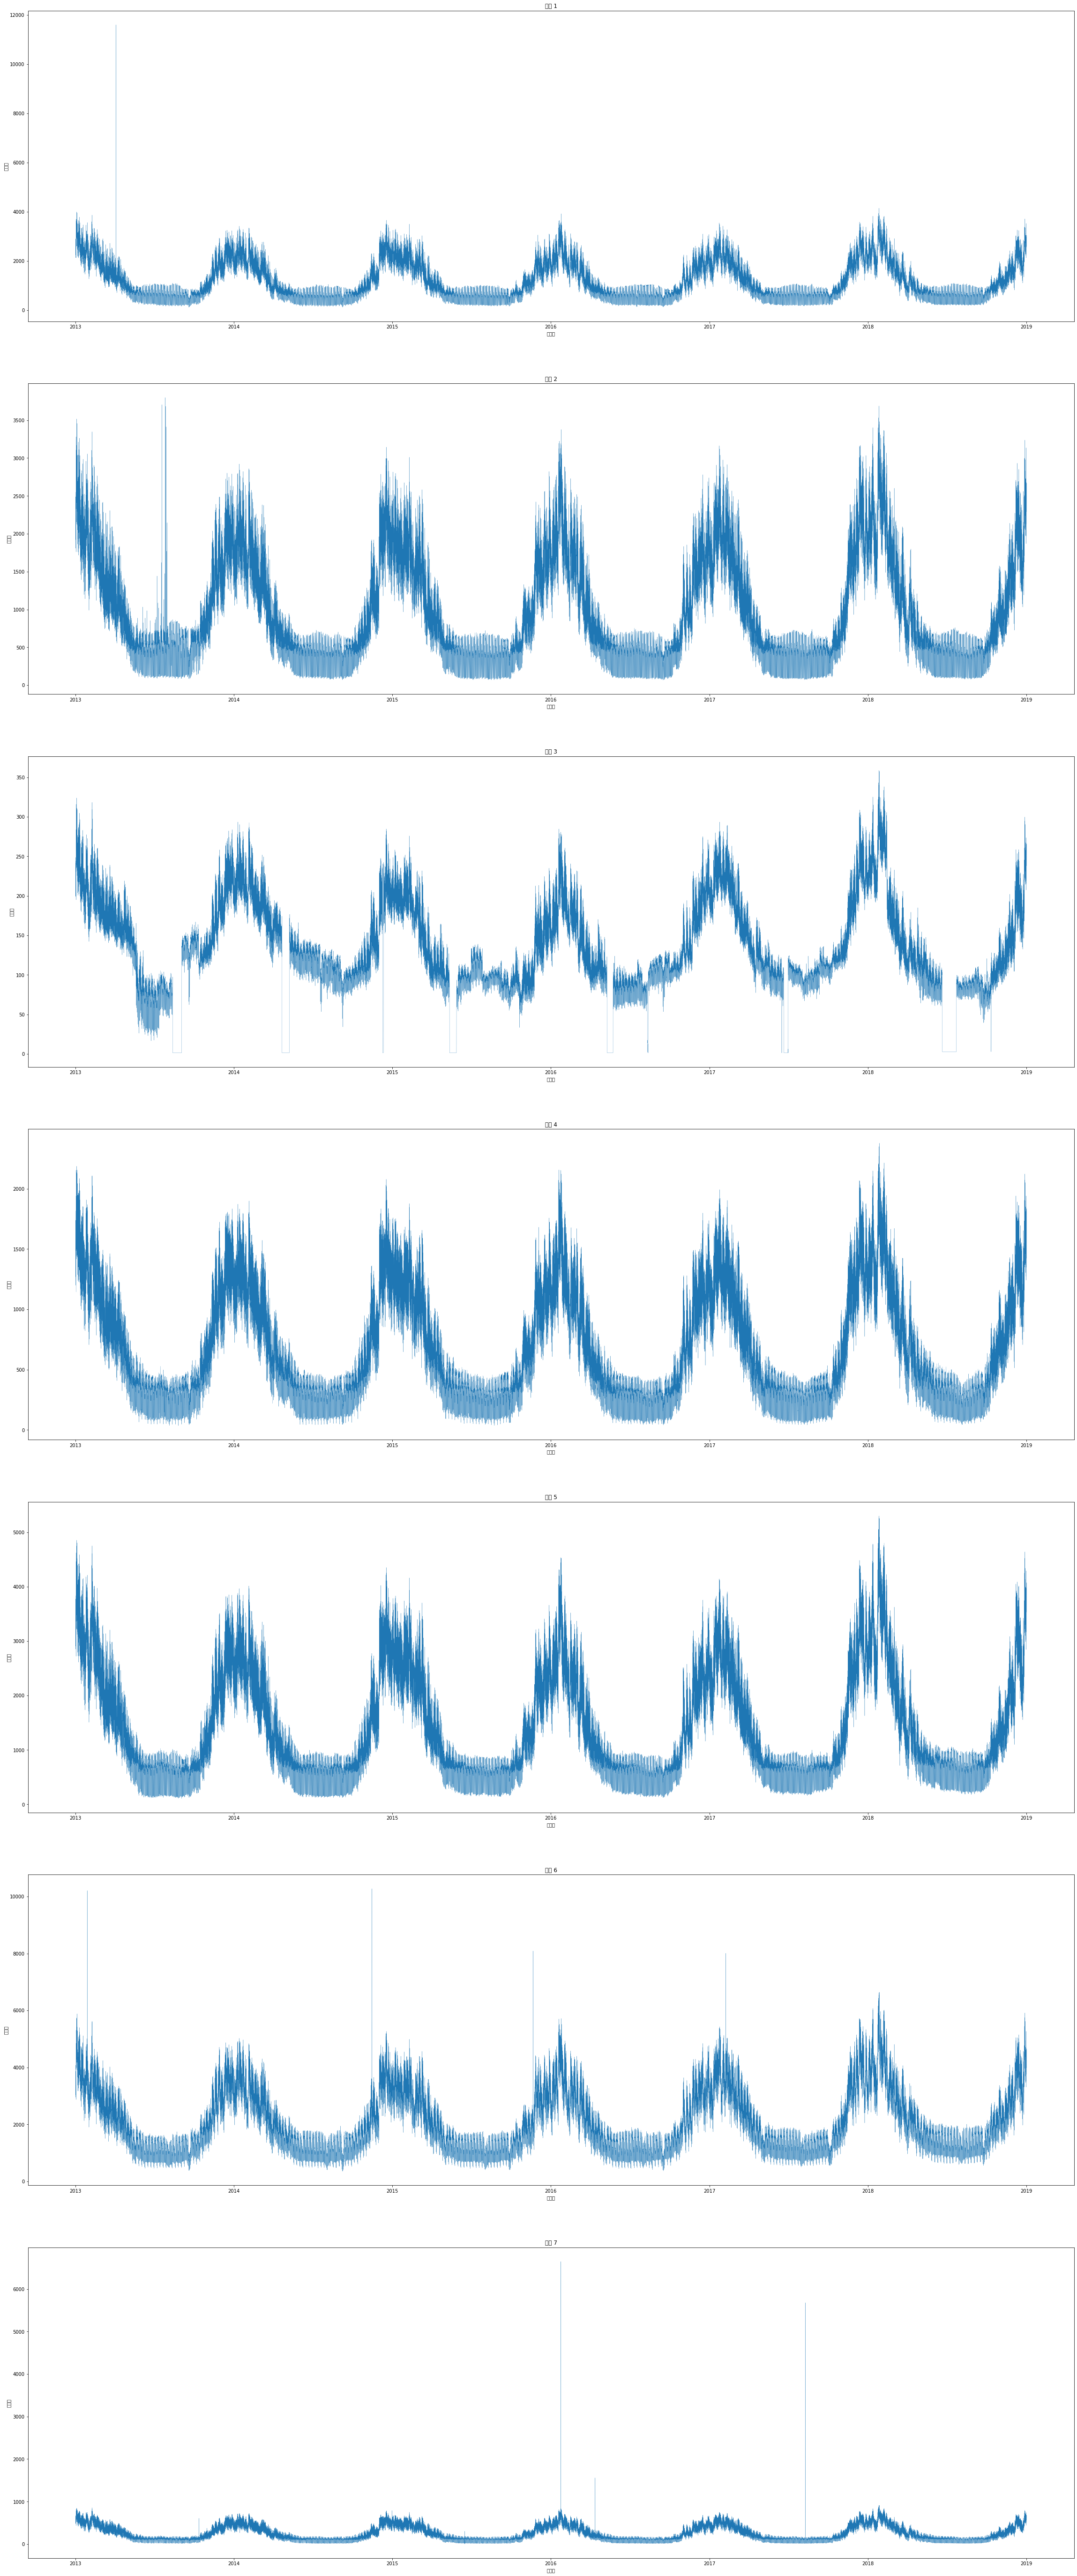

In [20]:
# usage of each 구분 ~ datetime
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (40, 100))
for i in total['구분'].unique():
    num_i = total[total.구분 == i]
    plt.subplot(7, 1, i)
    sns.lineplot(data = num_i, x = '연월일', y = '공급량', linewidth = 0.3)
    plt.title(f'구분 {i}')